In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv('./CV_Results.csv')
results

,Scene,PSNR_MSE,SSIM_MSE,B_PSNR,B_SSIM,PSNR_VGG,SSIM_VGG,PSNR_Motion,SSIM_Motion,PSNR_Fusion,SSIM_Fusion
0,3,28.4500,0.9989,28.0933,0.9987,28.0837,0.9963,27.3566,0.9738,27.6745,0.9825
1,5,31.1180,0.9483,26.8500,0.9549,30.2885,0.9328,28.8743,0.9248,26.6583,0.9262
2,6,35.4428,0.9656,31.9896,1.0065,34.2663,0.9423,33.4263,0.9085,27.6428,0.9238
3,8,32.3962,0.9463,28.8940,0.9503,30.1085,0.9436,27.6433,0.9286,26.8735,0.9326
4,13,36.8600,0.9367,32.5000,0.9497,28.8374,0.9267,27.5427,0.9228,33.8436,0.9448
5,15,40.5662,0.9979,43.0308,0.9993,38.9274,0.9863,36.7456,0.9784,36.3462,0.9872
6,18,39.3400,0.9992,39.9800,0.9993,37.2738,0.9992,36.2837,0.9832,37.6427,0.9808
7,21,38.8847,0.9981,44.9189,0.9997,37.9274,0.9982,35.7634,0.9974,34.4879,0.9965
8,23,37.5015,0.9969,40.3283,0.9994,36.9284,0.9942,34.4567,0.9942,31.6742,0.9938
9,24,38.3941,0.9977,40.0921,0.9994,34.9346,0.9923,31.2347,0.9901,32.4623,0.9925


Text(0.5, 0, 'PSNR')

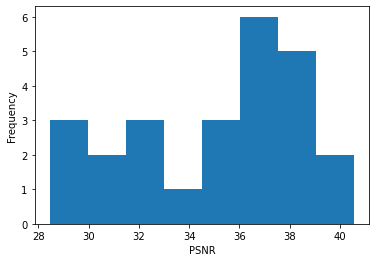

In [3]:
plt.hist(results["PSNR_MSE"], bins=8)
plt.ylabel("Frequency")
plt.xlabel("PSNR")

### Experiment 1a

Text(0.5, 1.0, 'Modified Network w MSE')

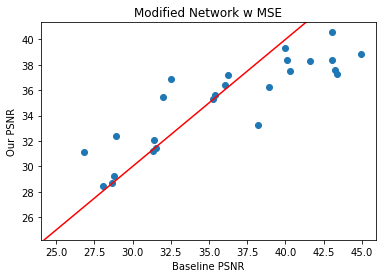

In [4]:
plt.scatter(results["B_PSNR"],results["PSNR_MSE"])
plt.axline((25, 25), slope=1, color='r')
plt.xlabel("Baseline PSNR")
plt.ylabel("Our PSNR")
plt.title("Modified Network w MSE")

In [5]:
# # Collect data into two separate arrays
# base = np.array(results["B_PSNR"])
# new = np.array(results["PSNR_MSE"])

# # Calculate t-statistic and p-value
# alpha = 0.05
# t, pval = ttest_rel(base, new,alternative = 'less')

# if pval < alpha:
#     print("p value = ", pval, "\nNull Hypothesis Rejected. New Method is better")
# else: 
#     print("p value = ", pval, "\nNull Hypothesis cannot be rejected. New method is not conclusively better")

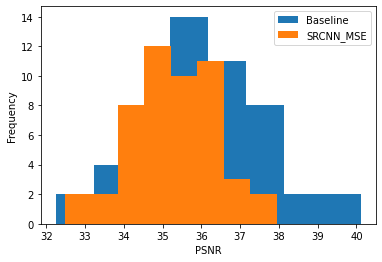

In [16]:
means_mse=[]
means_base=[]
for i in range(50): 

    mask=np.random.choice(24, 12)
    means_mse+=[np.mean(np.array(results["PSNR_MSE"])[mask])]
    means_base+=[np.mean(np.array(results["B_PSNR"])[mask])]

plt.hist(means_base, bins=8, label="Baseline")
plt.hist(means_mse, bins=8, label="SRCNN_MSE")
plt.ylabel("Frequency")
plt.xlabel("PSNR")
plt.legend()

In [17]:
# Calculate t-statistic and p-value

alpha = 0.05
t, pval = ttest_rel(means_base, means_mse,alternative = 'less')
if pval < alpha:
    print("p value = ", pval, "\nNull Hypothesis Rejected. New Method is better")
else: 
    print("p value = ", pval, "\nNull Hypothesis cannot be rejected. New method is not conclusively better")

p value =  0.9999999788090946 
Null Hypothesis cannot be rejected. New method is not conclusively better


### Experiment 1b

Text(0.5, 1.0, 'Modified Network w VGG Loss')

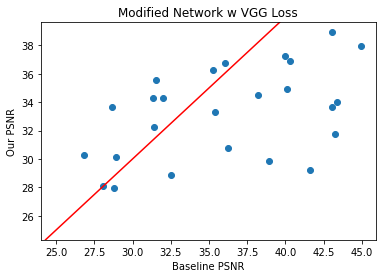

In [18]:
plt.scatter(results["B_PSNR"],results["PSNR_VGG"])
plt.axline((25, 25), slope=1, color='r')
plt.xlabel("Baseline PSNR")
plt.ylabel("Our PSNR")
plt.title("Modified Network w VGG Loss")

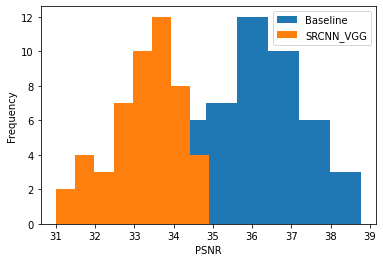

In [70]:
means_vgg=[]
means_base=[]
for i in range(50): 

    mask=np.random.choice(24, 12)
    means_vgg+=[np.mean(np.array(results["PSNR_VGG"])[mask])]
    means_base+=[np.mean(np.array(results["B_PSNR"])[mask])]

plt.hist(means_base, bins=8, label="Baseline")
plt.hist(means_vgg, bins=8, label="SRCNN_VGG")
plt.ylabel("Frequency")
plt.xlabel("PSNR")
plt.legend()

In [71]:
# Calculate t-statistic and p-value

alpha = 0.05
t, pval = ttest_rel(means_base, means_vgg,alternative = 'less')
if pval < alpha:
    print("p value = ", pval, "\nNull Hypothesis Rejected. New Method is better")
else: 
    print("p value = ", pval, "\nNull Hypothesis cannot be rejected. New method is not conclusively better")

p value =  1.0 
Null Hypothesis cannot be rejected. New method is not conclusively better


### Experiment 1c

Text(0.5, 1.0, 'Modified Network w Motion-Aware Loss')

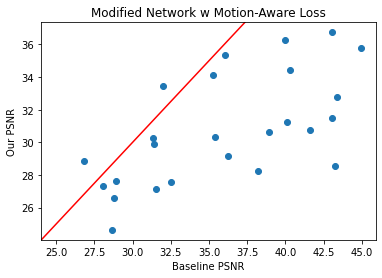

In [72]:
plt.scatter(results["B_PSNR"],results["PSNR_Motion"])
plt.axline((25, 25), slope=1, color='r')
plt.xlabel("Baseline PSNR")
plt.ylabel("Our PSNR")
plt.title("Modified Network w Motion-Aware Loss")

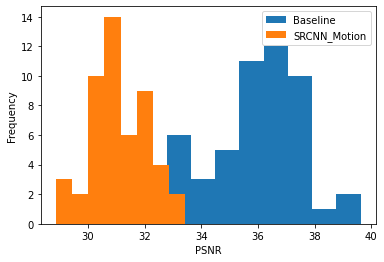

In [74]:
means_motion=[]
means_base=[]
for i in range(50): 

    mask=np.random.choice(24, 12)
    means_motion+=[np.mean(np.array(results["PSNR_Motion"])[mask])]
    means_base+=[np.mean(np.array(results["B_PSNR"])[mask])]

plt.hist(means_base, bins=8, label="Baseline")
plt.hist(means_motion, bins=8, label="SRCNN_Motion")
plt.ylabel("Frequency")
plt.xlabel("PSNR")
plt.legend()

In [75]:
# Calculate t-statistic and p-value

alpha = 0.05
t, pval = ttest_rel(means_base, means_motion,alternative = 'less')
if pval < alpha:
    print("p value = ", pval, "\nNull Hypothesis Rejected. New Method is better")
else: 
    print("p value = ", pval, "\nNull Hypothesis cannot be rejected. New method is not conclusively better")

p value =  1.0 
Null Hypothesis cannot be rejected. New method is not conclusively better


### Experiment 2

Text(0, 0.5, 'Image Fusion PSNR')

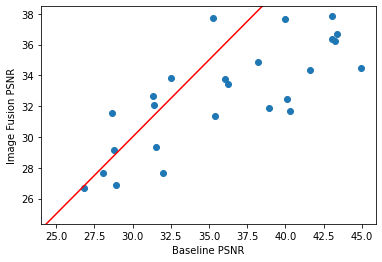

In [76]:
plt.scatter(results["B_PSNR"],results["PSNR_Fusion"])
plt.axline((25, 25), slope=1, color='r')
plt.xlabel("Baseline PSNR")
plt.ylabel("Image Fusion PSNR")

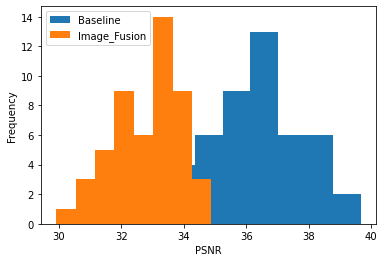

In [82]:
means_fusion=[]
means_base=[]
for i in range(50): 

    mask=np.random.choice(24, 12)
    means_fusion+=[np.mean(np.array(results["PSNR_Fusion"])[mask])]
    means_base+=[np.mean(np.array(results["B_PSNR"])[mask])]

plt.hist(means_base, bins=8, label="Baseline")
plt.hist(means_fusion, bins=8, label="Image_Fusion")
plt.ylabel("Frequency")
plt.xlabel("PSNR")
plt.legend()

In [84]:
# Calculate t-statistic and p-value

alpha = 0.05
t, pval = ttest_rel(means_base, means_fusion,alternative = 'less')
if pval < alpha:
    print("p value = ", pval, "\nNull Hypothesis Rejected. New Method is better")
else: 
    print("p value = ", pval, "\nNull Hypothesis cannot be rejected. New method is not conclusively better")

p value =  1.0 
Null Hypothesis cannot be rejected. New method is not conclusively better
